# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crypto
my_btc_value = btc_price * my_btc
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23815.84
The current value of your 5.3 ETH is $7689.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50


In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [20]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current price data for SPY and AGG
portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df

# Reorganize the DataFrame and Separate ticker data
AGG = portfolio[portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio[portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
portfolio

AGG                                    \
                            open     high      low  close   volume   
timestamp                                                            
2022-10-20 04:00:00+00:00  94.06  94.2555  93.5648  93.63  8860510   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-10-20 04:00:00+00:00       19980  93.841305  368.07  372.67  364.61   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-10-20 04:00:00+00:00  365.41  87963935      634944  367.710482

In [21]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio['AGG']['close'])
spy_close_price = float(portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $93.63
Current SPY closing price: $365.41


In [22]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18270.50
The current value of your 200 AGG shares is $18726.00


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value = my_spy_value
# Create savings DataFrame
savings_data = {'amounts':[crypto, shares]}
names = ['Crypto', 'Shares']
df_savings = pd.DataFrame(savings_data, index=names)
# Display savings DataFrame
df_savings.style.format('${:,.2f}')

,amounts
Crypto,"$31,505.50"
Shares,"$18,270.50"


array([<AxesSubplot:ylabel='amounts'>], dtype=object)

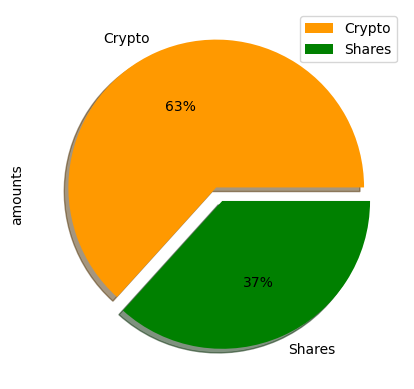

In [24]:
# Plot savings pie chart
df_savings.plot(kind='pie',shadow=True, colors= ['#FF9900', 'green'] , explode=(.05, .05), subplots=True, autopct='%1.0f%%')

In [25]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = crypto + shares

# Validate saving health
if savings >= emergency_fund:
    print('Congrats! you have enough savings!')
elif savings == emergency_fund:
    print('You are close, just a little more in savings.')
elif savings <= emergency_fund:
    print('Oh no, you need more in savings!')


Congrats! you have enough savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [28]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-20', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2022-10-20', tz='America/Chicago').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                    \
                            open     high      low  close   volume   
timestamp                                                            
2022-10-14 04:00:00+00:00  95.63  95.6300  94.6100  94.66  8567937   
2022-10-17 04:00:00+00:00  95.28  95.4000  94.8300  94.86  5455448   
2022-10-18 04:00:00+00:00  95.11  95.1800  94.6400  95.02  6108720   
2022-10-19 04:00:00+00:00  94.41  94.5584  94.1528  94.20  6295299   
2022-10-20 04:00:00+00:00  94.06  94.2555  93.5648  93.63  8860510   

                                                     SPY                      \
                          trade_count       vwap    open      high       low   
timestamp                                                                      
2022-10-14 04:00:00+00:00       22665  94.776094  368.54  370.2600  356.9600   
2022-10-17 04:00:00+00:00       20840  95.037152  363.99  367.9799  357.2808   
2022-10-18 04:00:00+00:00       21495  94.955551  375.07  375.4500  367.5200   
2022-10-19 04:00:00+00:00       18782  94.314399  368.98  371.8500  365.5500   
2022-10-20 04:00:00+00:00       19980  93.841305  368.07  372.6700  364.6100   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-10-14 04:00:00+00:00  357.63  122920585      818595  361.365272  
2022-10-17 04:00:00+00:00  366.82   92765345      609955  365.954505  
2022-10-18 04:00:00+00:00  371.13   96898206      675916  371.126991  
2022-10-19 04:00:00+00:00  368.50   79481512      531675  368.665769  
2022-10-20 04:00:00+00:00  365.41   87963935      634944  367.710482

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

mc_30yr = MCSimulation(portfolio_data= df_stock_data,weights=[.40, .60], num_simulation= 500, num_trading_days= 252*30)


In [37]:
# Printing the simulation input data
mc_30yr.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2017-10-23 04:00:00+00:00  109.40  109.470  109.360  109.42  2024767   
2017-10-24 04:00:00+00:00  109.23  109.290  109.170  109.19  1722478   
2017-10-25 04:00:00+00:00  108.96  109.130  108.950  109.12  2945420   
2017-10-26 04:00:00+00:00  109.20  109.229  108.980  109.00  2163496   
2017-10-27 04:00:00+00:00  109.07  109.260  109.035  109.24  1904955   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-23 04:00:00+00:00        9208  109.404970          NaN  257.51   
2017-10-24 04:00:00+00:00        8486  109.230095    -0.002102  256.56   
2017-10-25 04:00:00+00:00       12461  109.043379    -0.000641  256.23   
2017-10-26 04:00:00+00:00        8113  109.051672    -0.001100  256.01   
2017-10-27 04:00:00+00:00        8225  109.193461     0.002202  256.47   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2017-10-23 04:00:00+00:00  257.51  256.0200  256.11   64001716      196938   
2017-10-24 04:00:00+00:00  256.83  256.1500  256.56   69886571      193871   
2017-10-25 04:00:00+00:00  256.31  254.0000  255.29  103740803      318607   
2017-10-26 04:00:00+00:00  256.30  255.4800  255.62   71854886      178431   
2017-10-27 04:00:00+00:00  257.89  255.6254  257.71   85964044      230991   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-23 04:00:00+00:00  256.704266          NaN  
2017-10-24 04:00:00+00:00  256.490281     0.001757  
2017-10-25 04:00:00+00:00  255.251326    -0.004950  
2017-10-26 04:00:00+00:00  255.755127     0.001293  
2017-10-27 04:00:00+00:00  257.220580     0.008176

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/playb3yond40gb/PycharmProjects/FintechBootcamp/api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001771,0.994742,1.010103,1.019100,1.003043,1.016221,0.997784,0.996901,0.996098,0.994235,...,1.002831,1.005553,0.990294,1.015993,0.998596,1.008160,1.000079,1.002293,1.003359,1.001573
2,1.000594,0.994759,0.993816,1.021444,1.011744,1.003460,1.002767,0.991502,0.980559,0.999927,...,0.999801,1.021231,0.992898,1.018283,0.998306,1.012356,1.003144,0.992880,0.998437,1.003897
3,0.996459,0.998413,0.989666,1.017270,1.014547,1.000660,1.006520,0.989573,0.995483,1.005709,...,1.005057,1.032077,0.997687,1.025581,0.999352,1.007901,1.007488,1.002451,0.988376,1.004904
4,1.006482,0.996209,0.973221,1.032829,1.021857,0.999329,1.010914,0.982153,0.992534,0.994583,...,1.009278,1.052617,0.999101,1.039335,0.999903,1.004423,1.011392,1.000831,0.992973,1.000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.527874,3.737911,4.286036,6.944261,4.511526,1.604049,3.329233,2.308034,4.343007,3.962658,...,3.711414,8.012190,1.267670,2.665756,1.861116,2.771968,0.423017,4.266927,2.131829,3.466431
7557,3.495300,3.685449,4.240046,6.891432,4.546106,1.603227,3.351693,2.305405,4.363426,3.960536,...,3.700138,8.098866,1.265410,2.711269,1.848889,2.806267,0.425321,4.238168,2.102641,3.433914
7558,3.468247,3.691736,4.221001,6.920977,4.528637,1.631410,3.357703,2.316821,4.395726,3.915964,...,3.731844,8.091031,1.260516,2.687816,1.848133,2.830450,0.426523,4.218322,2.090550,3.409684
7559,3.487524,3.696287,4.255023,6.976113,4.557304,1.619528,3.394151,2.295489,4.411344,3.874367,...,3.713343,8.041696,1.261680,2.669309,1.848914,2.806158,0.428143,4.188287,2.091092,3.398304


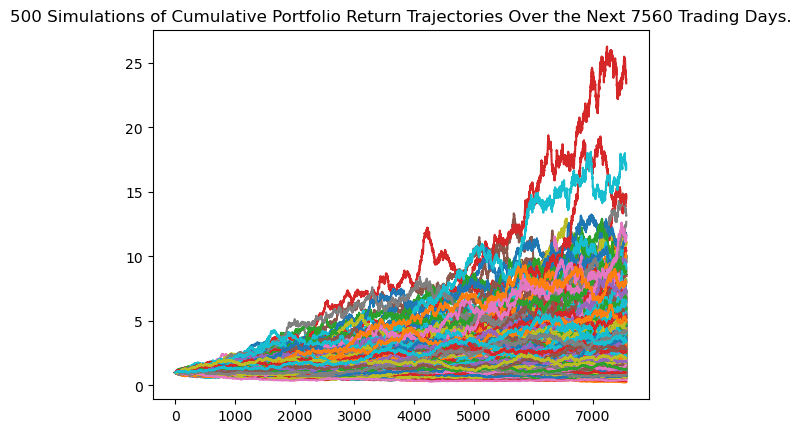

In [39]:
# Plot simulation outcomes
line_plot = mc_30yr.plot_simulation()

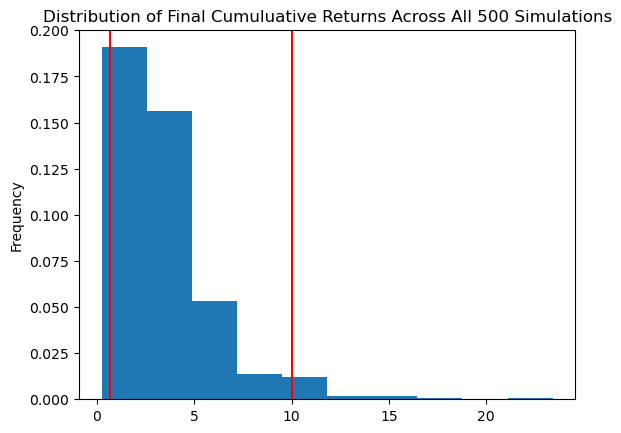

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = mc_30yr.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = mc_30yr.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean              3.477313
std               2.585372
min               0.246373
25%               1.743804
50%               2.795583
75%               4.376356
max              23.414691
95% CI Lower      0.698099
95% CI Upper     10.003869
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(mc_summary[9]*initial_investment,2)
ci_lower = round(mc_summary[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $13961.98 and $200077.38


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(mc_summary[9]*initial_investment,2)
ci_lower = round(mc_summary[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $20942.96 and $300116.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [2]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yr = MCSimulation(portfolio_data= df_stock_data,weights=[.60, .40], num_simulation= 500, num_trading_days= 252*5)

NameError: name 'MCSimulation' is not defined

In [1]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yr.calc_cumulative_return()

NameError: name 'mc_5yr' is not defined

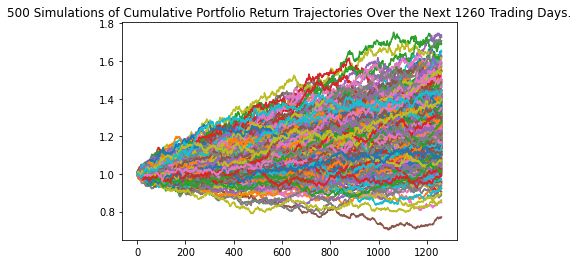

In [26]:
# Plot simulation outcomes
line_5yr = mc_5yr.plot_distribution()

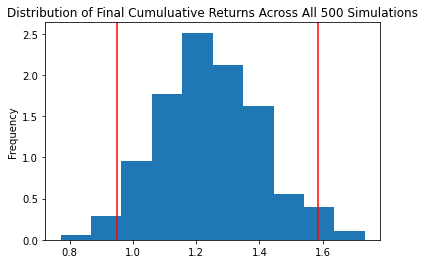

In [27]:
# Plot probability distribution and confidence intervals
dist_5yr = mc_5yr.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_5yr_summary = mc_5yr.summarize_cumulative_return()

# Print summary statistics
print(mc_5yr_summary)

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five = round(mc_5yr_summary[9] * initial_investment_5, 2)
ci_lower_five = round(mc_5yr_summary[8] * initial_investment_5, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr = MCSimulation(portfolio_data= df_stock_data,weights=[.60, .40], num_simulation= 500, num_trading_days= 252*10)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


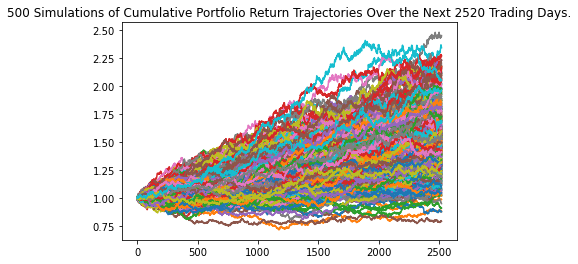

In [32]:
# Plot simulation outcomes
line_10yr = mc_10yr.plot_simulation()

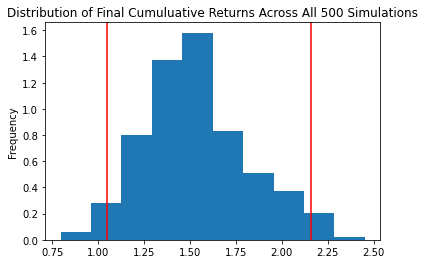

In [33]:
# Plot probability distribution and confidence intervals
dist_10yr = mc_10yr.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_10yr_summary = mc_10yr.summarize_cumulative_return()

# Print summary statistics
print(mc_10yr_summary)

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = round(mc_5yr_summary[9] * initial_investment_10, 2)
ci_lower_ten = round(mc_5yr_summary[8] * initial_investment_10, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
